## Model Training
#### 1.1 Import Data and Required Packages

Importing Pandas, NumPy, Matplotlib, Seaborn, Warning Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import missingno as mno

# Modelling
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix, classification_report  
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("C:/Users/chhot/Desktop/demo/ML_Project/notebook/data/Synthetic_Data_Water_Quality.csv")

### Show Top 5 records

In [3]:
df.head()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,8.34,3.39,8.06,819.00,787.15,279.89,0.09,129.30,0.22,13.13,81.01,2.24,12.69,107.95,17.50,22.23,0.41,potable
1,14.45,3.36,8.28,1371.10,779.66,112.04,0.20,163.73,0.13,127.48,307.99,4.05,52.01,107.12,45.28,16.06,0.68,potable
2,3.87,4.23,6.86,202.75,485.10,113.17,0.15,66.68,0.29,142.97,16.70,0.86,88.47,127.47,4.90,19.81,0.91,potable
3,14.57,1.75,7.00,696.16,409.71,140.39,0.06,102.42,0.15,194.07,393.09,2.60,61.36,99.16,36.73,42.82,0.02,potable
4,9.01,2.20,6.73,129.24,343.55,6.52,0.07,140.47,0.28,3.77,170.65,0.04,47.22,107.17,44.79,14.35,2.08,potable


In [4]:
df = df.sample(frac = 1)
df

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
434,2.50,0.04,7.38,445.45,684.11,169.12,0.10,206.34,0.01,70.10,203.31,4.01,37.57,11.41,40.71,41.06,1.76,potable
1331,13.60,0.20,6.54,908.58,165.53,112.68,0.07,124.71,0.17,130.05,138.25,4.41,5.65,28.00,40.92,16.02,1.79,potable
9524,16.61,5.72,11.69,2551.10,1288.73,386.68,0.32,268.46,0.44,336.60,661.86,7.92,197.41,159.19,57.07,47.64,4.01,non-potable
8978,29.13,9.52,10.19,2911.11,1358.92,468.94,0.34,312.11,0.60,298.25,410.72,7.27,152.94,183.38,81.39,48.64,4.38,non-potable
8453,29.72,7.39,4.74,2404.95,1410.41,499.93,0.31,252.16,0.57,238.66,699.86,7.29,186.67,213.95,73.79,69.94,2.66,non-potable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,11.02,3.10,8.27,179.62,832.09,201.75,0.06,167.66,0.28,10.70,5.10,0.85,65.18,18.09,26.42,41.53,0.65,potable
8887,26.62,5.57,2.47,2252.70,1023.49,464.87,0.22,370.06,0.54,309.75,406.16,9.60,113.65,195.71,57.38,87.66,3.99,non-potable
4404,7.08,1.41,6.75,529.10,933.11,31.46,0.06,148.96,0.06,22.17,322.57,3.74,19.50,118.65,42.99,25.05,1.15,potable
312,10.86,3.05,7.91,851.86,996.74,7.91,0.01,88.59,0.06,146.32,309.24,2.30,34.20,91.97,20.82,11.52,0.43,potable


In [5]:
df = df.reset_index()
df = df.drop(columns=['index'])
df

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,2.50,0.04,7.38,445.45,684.11,169.12,0.10,206.34,0.01,70.10,203.31,4.01,37.57,11.41,40.71,41.06,1.76,potable
1,13.60,0.20,6.54,908.58,165.53,112.68,0.07,124.71,0.17,130.05,138.25,4.41,5.65,28.00,40.92,16.02,1.79,potable
2,16.61,5.72,11.69,2551.10,1288.73,386.68,0.32,268.46,0.44,336.60,661.86,7.92,197.41,159.19,57.07,47.64,4.01,non-potable
3,29.13,9.52,10.19,2911.11,1358.92,468.94,0.34,312.11,0.60,298.25,410.72,7.27,152.94,183.38,81.39,48.64,4.38,non-potable
4,29.72,7.39,4.74,2404.95,1410.41,499.93,0.31,252.16,0.57,238.66,699.86,7.29,186.67,213.95,73.79,69.94,2.66,non-potable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11.02,3.10,8.27,179.62,832.09,201.75,0.06,167.66,0.28,10.70,5.10,0.85,65.18,18.09,26.42,41.53,0.65,potable
9996,26.62,5.57,2.47,2252.70,1023.49,464.87,0.22,370.06,0.54,309.75,406.16,9.60,113.65,195.71,57.38,87.66,3.99,non-potable
9997,7.08,1.41,6.75,529.10,933.11,31.46,0.06,148.96,0.06,22.17,322.57,3.74,19.50,118.65,42.99,25.05,1.15,potable
9998,10.86,3.05,7.91,851.86,996.74,7.91,0.01,88.59,0.06,146.32,309.24,2.30,34.20,91.97,20.82,11.52,0.43,potable


### LabelEncoding

In [6]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [7]:
df['Potability'] = enc.fit_transform(df['Potability'])

In [8]:
y = df.iloc[:,-1]

In [9]:
y

0       1
1       1
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    1
9998    1
9999    0
Name: Potability, Length: 10000, dtype: int32

In [10]:
x = df.iloc[:,:-1]

In [11]:
x

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l)
0,2.50,0.04,7.38,445.45,684.11,169.12,0.10,206.34,0.01,70.10,203.31,4.01,37.57,11.41,40.71,41.06,1.76
1,13.60,0.20,6.54,908.58,165.53,112.68,0.07,124.71,0.17,130.05,138.25,4.41,5.65,28.00,40.92,16.02,1.79
2,16.61,5.72,11.69,2551.10,1288.73,386.68,0.32,268.46,0.44,336.60,661.86,7.92,197.41,159.19,57.07,47.64,4.01
3,29.13,9.52,10.19,2911.11,1358.92,468.94,0.34,312.11,0.60,298.25,410.72,7.27,152.94,183.38,81.39,48.64,4.38
4,29.72,7.39,4.74,2404.95,1410.41,499.93,0.31,252.16,0.57,238.66,699.86,7.29,186.67,213.95,73.79,69.94,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11.02,3.10,8.27,179.62,832.09,201.75,0.06,167.66,0.28,10.70,5.10,0.85,65.18,18.09,26.42,41.53,0.65
9996,26.62,5.57,2.47,2252.70,1023.49,464.87,0.22,370.06,0.54,309.75,406.16,9.60,113.65,195.71,57.38,87.66,3.99
9997,7.08,1.41,6.75,529.10,933.11,31.46,0.06,148.96,0.06,22.17,322.57,3.74,19.50,118.65,42.99,25.05,1.15
9998,10.86,3.05,7.91,851.86,996.74,7.91,0.01,88.59,0.06,146.32,309.24,2.30,34.20,91.97,20.82,11.52,0.43


### Preparing X and Y variables

In [12]:
# separate dataset into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [13]:
# Create Column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [14]:
x = preprocessor.fit_transform(x)

In [15]:
x.shape

(10000, 17)

In [16]:
# separate dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((8000, 17), (2000, 17))

### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0708
- Mean Absolute Error: 0.0569
- R2 Score: 0.9800
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0705
- Mean Absolute Error: 0.0564
- R2 Score: 0.9801


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.5000
- Mean Absolute Error: 0.5000
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5000
- Mean Absolute Error: 0.5000
- R2 Score: -0.0001


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0708
- Mean Absolute Error: 0.0569
- R2 Score: 0.9800
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0705
- Mean Absolute Error: 0.0564
- R2 Score: 0.9801


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,1.000000
4,Decision Tree,1.000000
8,AdaBoost Regressor,1.000000
6,XGBRegressor,1.000000
5,Random Forest Regressor,0.999991
7,CatBoosting Regressor,0.999988
0,Linear Regression,0.980127
2,Ridge,0.980127
1,Lasso,-0.000056


In [20]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape) 

X_train shape: (8000, 17)
X_test shape: (2000, 17)
y_train shape: (8000,)
y_test shape: (2000,)


## Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 98.01


## Logistic Regression

In [22]:
log_model = LogisticRegression()
log_model = log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Desicion Tree Classifier

In [23]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Random Forest classifier

In [24]:
rf_model = DecisionTreeClassifier()
rf_model = rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


### Plot y_pred and y_test

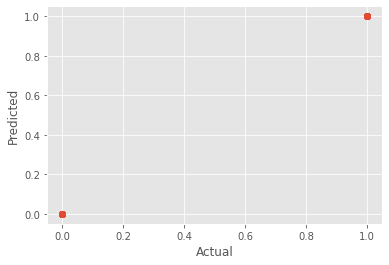

In [27]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

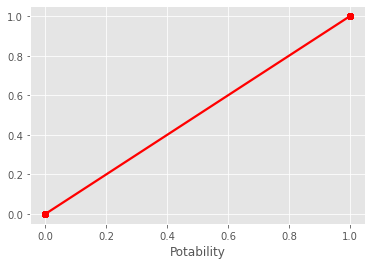

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Classifiation Report

In [25]:
report = classification_report(y_pred, y_test, digits=4)

In [26]:
print(report)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       994
           1     1.0000    1.0000    1.0000      1006

    accuracy                         1.0000      2000
   macro avg     1.0000    1.0000    1.0000      2000
weighted avg     1.0000    1.0000    1.0000      2000

